#Cutting a Rod (Problema de las Varillas)

##1. Descripción del Problema
El problema de las varillas está basado en un caso hipotético. Hay que suponer que se tiene un conjunto de varillas largas las cuales se pueden cortar/separar en varillas más pequeñas. Cada varilla de largo $i$, puede venderse en un cierto precio, el cual varía según su largo. Por ende, es necesario saber como se podría maximizar el precio de una varilla de largo $i$ , si es que se tiene una lista de precios asignada a una lista de longitudes $i$ posibles.

La respuesta a este problema depende de los precios registrados para cada largo, ya que es posible una varilla de largo $i$ cueste lo suficiente por si sola como para ser el costo máximo, como también podría darse el caso de que cortando la varilla en dos o más divisiones, la suma del costo de estas de como resultado un mayor valor que el costo de la varilla inicial.

---

#### **Entradas y Salidas:**

**Entrada**: Largo de varilla $n$, arreglo de precios por cada medida $i=1..n$

**Salida**: Valor del retorno máximo $r_n$ que se puede obtener cortando o no  la varilla y vendiendo las partes.

##2. Descripción del Algoritmo:

Existen dos acercamientos para resolver el problema anteriormente descrito, está el método **Recursivo** y el método por **Programación Dinámica**. Si bien, ambos convergen en la forma de analizar el problema y encontrar una estructura que permita resolver aquel, estos métodos se distancian al momento de crear procedimiento óptimo para llegar a la solución. Es por esto, que se detallará más sobre ambos métodos a continuación, pero dando especial énfasis a aquel paradigma de programación dinámica que permitirá una solución que además de exacta, será eficiente.

---
### Subestructura óptima:
Como se mencionó anteriormente, ambos métodos convergen en una característica, la de identificar una subestructura que permita representar de mejor forma una solución al problema.

Para encontrar la subestructura resulta necesario analizar el problema a detalle, para así dar lugar a cuales podrían ser las posibles respuestas/retornos que entregue el algoritmo. Es así, que es posible notar que teniendo una varilla completa de precio $P[n]$, se pueden obtener 2 posibles costos máximos:

- Si el precio de la varilla como tal $P[n]$, entonces es el precio máximo y no se necesitan cortes.
- Si se puede cortar de alguna forma una varilla, de modo que quede representada como el precio del corte $P[i]$, más el retorno máximo que se obtenga de la varilla restante $r$<sub>$n-i$</sub>.

Considerando lo ya establecido es posible determinar una definición general para el valor óptimo a buscar. Este sería el siguiente:

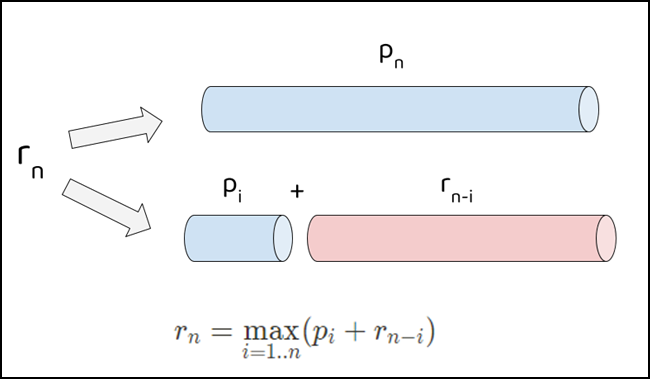

---
###Método Recursivo:
Este método considera que el retorno máximo se puede separar en las 2 soluciones posibles vistas anteriormente, por lo que la función debe de analizar cual de ellas es la correcta. Para esto simplemente compara los valores obtenidos por ambas soluciones y luego retorna la de mayor valor. Los pasos que sigue este algoritmo son:

- Comprobar si se está en un caso base ($i = 0$). Si es así, retornar el valor mínimo $0$.
- Iterar $n$ para encontrar el máximo valor de cada sub-problema $P[i]$.
- Dentro de cada iteración, hacer uso de la recursión en un problema $P[i]$ para encontrar la respuesta a todos sus posibles cortes.
- Tras haber encontrado la solución final, esta se retorna.

Este método requiere de varias iteraciones para calcular el valor de $r[n-i]$, puesto a que calcula cada posible corte desde cero, es decir, tiene que calcular sub-problemas que ya realizó antes, y a veces, calcular incluso cortes simétricos. Todo eso lleva a una pérdida de tiempo e iteraciones, que acaban por aletargar el procedimiento.

A continuación se presenta el código para resolver el problema de forma **recursiva**.



In [1]:
def cutRod (price, lengthValue):
    if lengthValue == 0:
        return 0
    maxValue = -1
    for i in range (1, lengthValue+1):
        maxValue = max(maxValue, price[i-1] + cutRod(price,lengthValue-i))
    return maxValue

---
###Programación Dinámica:
Este paradigma es perfecto para esta clase de problemas, donde, si se intenta obtener todas las posibles combinaciones, es posible analizar que algunas o más bien varias soluciones se repiten. Lo que hace este método es guardar las soluciones encontradas en sub-problemas más pequeños dentro de un arreglo, de modo que cuando se necesite alguna de estas soluciones, sólo se tenga que extraer el dato, en vez de calcularlo nuevamente. Este sistema mencionado se conoce como **acercamiento Bottom-Up**, y se puede explicar mejor con el siguiente grafo:

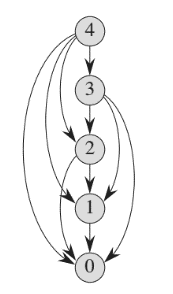

###Pasos a Seguir:
Para resolver el problema utilizando **Programación Dinámica** y el **Acercamiento Bottom-Up**, se deben seguir los siguientes pasos:

1. Crear un arreglo auxiliar de máximos valores. Se debe inicializar la primera posición en $0$ para considerar el caso base.
2. Resolver desde abajo hasta arriba los sub-problemas presentados, siguiendo la lógica de **Bottom-Up**.
3. Dentro de cada sub-problema, obtener el valor máximo según la definición presentada. Sin embargo, es destacable que en lugar de tener que calcular de forma recursiva algún valor, sólo es necesario obtener el resultado de alguna iteración anterior desde el arreglo de máximos.
4. Agregar el máximo encontrado al arreglo de máximos en función de que pueda ser utilizado por alguna iteración futura.
5. Retornar el máximo que se haya pedido.

El código para resolver el problema mediante el **Acercamiento Bottom-Up**, es el siguiente:

In [2]:
#Implementación con Bottom Up
def bottomUpCutRod (price, lengthValue):
  #Crear arreglo de Máximos.
  maxArr = []
  #Marcar el caso base length = 0.
  maxArr.append(0)
  #Resolver los sub-problemas de distintos tamaños en orden Bottom-Up.
  for j in range (1, lengthValue+1):
    #Declarar inicialmente un valor falso para el máximo de la solución.
    maxValue = -1
    #Resolver los sub-problemas del sub-problema en orden Bottom-Up.
    for i in range (1, j+1):
      #Ecuación de definición para sacar el valor de MaxValue.
      maxValue = max(maxValue, price[i-1] + maxArr[j-i])
    #Agregar el máximo encontrado en el tamaño actual al arreglo.
    maxArr.append(maxValue)
  #Retornar el sub-problema correspondiente al problema inicial.
  return maxArr[lengthValue]

---
###Ejemplo de Ejecución:

A continuación se presenta un ejemplo de ejecución del algoritmo siguiendo el paradigma de **Programación Dinámica**:

        P = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
        L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        i = 4

        ---> Crear arreglo de máximos: 
        max = []

        ---> Inicializar el valor de max[0] como 0.
        max[0] = 0   --- En Python: max.append(0)

        ---> Recorrer los sub-problemas del menor al mayor:
        ------------------ Iteración 1: ------------------
        P = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
        L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        i = 4; j = 1

        max[1] = P[1] + max[1-1] = 1 + 0 = **1**.
        ---> Se guarda max[1] = 1.
        ------------------ Iteración 2: ------------------
        j = 2

        max[2] = P[1] + max[2-1] = 1 + 1 = **2**.
               = P[2] + max[2-2] = 5 + 0 = **5**.
        ---> Se guarda max[2] = 5.
        ------------------ Iteración 3: ------------------
        j = 3

        max[3] = P[1] + max[3-1] = 1 + 5 = **2**.
               = P[2] + max[3-2] = 5 + 1 = **5**.
               = P[3] + max[3-3] = 8 + 0 = **5**.
        ---> Se guarda max[3] = 8.
        ------------------ Iteración 4: ------------------
        j = 4

        max[4] = P[1] + max[4-1] = 1 + 8 = **9**.
               = P[2] + max[4-2] = 5 + 5 = **10**.
               = P[3] + max[4-3] = 8 + 1 = **9**.
               = P[4] + max[4-4] = 9 + 0 = **9**.
        ---> Se guarda max[4] = 10.
        ==================================================
        Se retorna el valor de max[i] = max[4] = 10.


                

##3. Implementación del Algoritmo:

El siguiente trozo de código muestra la implementación del algoritmo **recursivo** para el problema de las varillas:

In [187]:
#Versión con contador de comparaciones.
def cutRod (price, cutsArr, lengthValue, cont):
    #Caso base
    if lengthValue == 0:
        return 0, cutsArr, cont
    #Inicializar solución
    maxValue = -1
    #Recorrer sub-problemas
    for i in range (1, lengthValue+1):
        cont += 1
        #Recursión
        maxi, cutsArr, cont = cutRod(price, cutsArr, lengthValue-i, cont)
        #Asignar el valor máximo
        if maxValue < price[i-1] + maxi:
          maxValue = price[i-1] + maxi
          cutsArr[lengthValue] = i
    return maxValue, cutsArr, cont

#Función que imprime los datos de la solución.
def printData (lengthValue, cutsArr, price):
  #Realizar Función
  maxValue, cutsArr, cont = cutRod(price, cutsArr, lengthValue, 0)
  #Imprimir Datos
  print("Máximo retorno:", maxValue)
  print(f"El máximo de la varilla de largo {lengthValue} se obtiene con los siguientes cortes:")
  enumeracion = 0
  while lengthValue > 0:
    enumeracion += 1
    print(f"   {enumeracion}.- Varilla de largo {cutsArr[lengthValue]}, costo: {price[cutsArr[lengthValue]-1]}")
    lengthValue = lengthValue-cutsArr[lengthValue]
  print("Cantidad de Recursiones:", cont)

#Datos del Ejemplo
price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cutsArr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lengthValue = 10
printData(lengthValue, cutsArr, price)

Máximo retorno: 30
El máximo de la varilla de largo 10 se obtiene con los siguientes cortes:
   1.- Varilla de largo 10, costo: 30
Cantidad de Recursiones: 1023


Implementación **recursiva** con `verbose = True`:

In [188]:
from termcolor import cprint

#Versión con contador de comparaciones.
def cutRod (price, cutsArr, lengthValue, cont):
    #Caso base
    print("Encontrar solución de ", end='')
    cprint(f"r[{lengthValue}]", "white", attrs=['bold'], end=' ')
    if lengthValue == 0:
        cprint("---> Caso Base r[0] = 0", "red", attrs=['bold'])
        return 0, cutsArr, cont
    #Inicializar solución
    maxValue = -1
    #Recorrer sub-problemas
    for i in range (1, lengthValue+1):
        cont += 1
        #Recursión
        cprint("---> Aplicar Recursión", "yellow")
        maxi, cutsArr, cont = cutRod(price, cutsArr, lengthValue-i, cont)
        #Asignar el valor máximo
        if maxValue < price[i-1] + maxi:
          maxValue = price[i-1] + maxi
          cutsArr[lengthValue] = i
    print("Solución encontrada para ", end='')
    cprint(f"r[{lengthValue}]: {maxValue}", "blue", attrs=['bold'])
    return maxValue, cutsArr, cont

#Datos del Ejemplo
price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cutsArr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lengthValue = 4
printData(lengthValue, cutsArr, price)

Encontrar solución de r[4] ---> Aplicar Recursión
Encontrar solución de r[3] ---> Aplicar Recursión
Encontrar solución de r[2] ---> Aplicar Recursión
Encontrar solución de r[1] ---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[1]: 1
---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[2]: 5
---> Aplicar Recursión
Encontrar solución de r[1] ---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[1]: 1
---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[3]: 8
---> Aplicar Recursión
Encontrar solución de r[2] ---> Aplicar Recursión
Encontrar solución de r[1] ---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[1]: 1
---> Aplicar Recursión
Encontrar solución de r[0] ---> Caso Base r[0] = 0
Solución encontrada para r[2]: 5
---> Aplicar Recursión
Encontra

Ahora se procederá a mostrar la implementación del algoritmo **Bottom-Up** para el problema de las varillas:

In [77]:
#Implementación con Programación Dinámica.
def BottomUpCutRod (price, lengthValue, cont):
  maxArr = []
  cutsArr = []
  #Marcar el caso base len = 0.
  maxArr.append(0)
  cutsArr.append(0)
  #Resolver los sub-problemas
  for j in range (1, lengthValue+1):
    maxValue = -1
    cutsArr.append(j)
    #El siguiente for resuelve los sub-sub-problemas más pequeños.
    for i in range (1, j+1):
      cont+=1
      #Compara cual valor obtiene un mayor precio
      if (maxValue < price[i-1] + maxArr[j-i]):
        #Reasigna el mayor precio
        maxValue = price[i-1] + maxArr[j-i]
        #Guarda en el arreglo cutsArr el largo del último corte realizado.
        cutsArr[j] = i
    #Agrega el máximo valor a la lista de máximos.
    maxArr.append(maxValue)
  #Retornar el sub-problema correspondiente al problema inicial.
  return maxArr, cutsArr, cont

In [78]:
def printCutRodSolution (price, lengthValue, cont):
  r, s, cont = BottomUpCutRod(price, lengthValue, cont)
  print("Arreglo de Máximos Precios: ", r, "\nArreglo de Cortes: ", s)
  print(f"\nEl máximo de la varilla de largo {lengthValue} se obtiene con los siguientes cortes:")
  enumeracion = 0
  while lengthValue > 0:
    enumeracion += 1
    print(f"   {enumeracion}.- Varilla de largo {s[lengthValue]}, costo: {r[s[lengthValue]]}")
    lengthValue = lengthValue-s[lengthValue]
  print(f"\nSub-problemas resueltos: {cont}")

#Ejemplo:
price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(" ________________________________________________________")
print("|         Tabla de Precios por Largo de Varilla          |")
print("| ------------------------------------------------------ |")
print("| L(i) |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 |")
print("| P(i) |  1 |  5 |  8 |  9 | 10 | 17 | 17 | 20 | 24 | 30 |")
print(" ________________________________________________________\n")
num = 10
cont = 0
print("Se busca el precio máximo de una varilla de largo:", num, "\n")
printCutRodSolution(price, num, cont)

 ________________________________________________________
|         Tabla de Precios por Largo de Varilla          |
| ------------------------------------------------------ |
| L(i) |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 |
| P(i) |  1 |  5 |  8 |  9 | 10 | 17 | 17 | 20 | 24 | 30 |
 ________________________________________________________

Se busca el precio máximo de una varilla de largo: 10 

Arreglo de Máximos Precios:  [0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30] 
Arreglo de Cortes:  [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10]

El máximo de la varilla de largo 10 se obtiene con los siguientes cortes:
   1.- Varilla de largo 10, costo: 30

Sub-problemas resueltos: 55


Implementación **Bottom-Up** con `verbose = True`:

In [169]:
#Implementación con Programación Dinámica.
def BottomUpCutRod (price, lengthValue, cont, verbose):
  if verbose == True:
    print("Crear arreglo de máximos y arreglo de cortes...")
  maxArr = []
  cutsArr = []
  #Marcar el caso base len = 0.
  maxArr.append(0)
  cutsArr.append(0)
  if verbose == True:
    print(f"Arreglo de Máximos: {maxArr}")
    print(f"Arreglo de Cortes: {cutsArr}\n")
  #Resolver los sub-problemas
  for j in range (1, lengthValue+1):
    maxValue = -1
    cutsArr.append(j)
    #El siguiente for resuelve los sub-sub-problemas más pequeños.
    for i in range (1, j+1):
      cont+=1
      #Compara cual valor obtiene un mayor precio
      if (maxValue < price[i-1] + maxArr[j-i]):
        #Reasigna el mayor precio
        maxValue = price[i-1] + maxArr[j-i]
        #Guarda en el arreglo cutsArr el largo del último corte realizado.
        cutsArr[j] = i
        if verbose == True and i == j:
          print("--------------------------------------------------------------")
          cprint(f"Solución encontrada para length[{j}]: {maxValue}", "green")
          cprint("No se necesitan cortes... ", "yellow")
    #Agrega el máximo valor a la lista de máximos.
    maxArr.append(maxValue)
    if verbose == True and cutsArr[j] != j:
      contCut = 0
      k = j
      while (cutsArr[k]):
        contCut += 1
        k -= cutsArr[k]
      print("--------------------------------------------------------------")
      cprint(f"Solución encontrada para length[{j}]: {maxArr[j]}", "green")
      cprint(f"Se necesitaron {contCut} cortes... ", "yellow")
    if verbose == True:
      cprint(f"Arreglo de Máximos: {maxArr}", "blue")
      cprint(f"Arreglo de Cortes: {cutsArr}", "blue")
  #Retornar el sub-problema correspondiente al problema inicial.
  return maxArr, cutsArr, cont

In [170]:
def printCutRodSolution (price, lengthValue, cont, verbose):
  r, s, cont = BottomUpCutRod(price, lengthValue, cont, verbose)
  print("=============================================================\n")
  print("Arreglo de Máximos Precios: ", r, "\nArreglo de Cortes: ", s)
  print(f"\nEl máximo de la varilla de largo {lengthValue} se obtiene con los siguientes cortes:")
  enumeracion = 0
  while lengthValue > 0:
    enumeracion += 1
    print(f"   {enumeracion}.- Varilla de largo {s[lengthValue]}, costo: {r[s[lengthValue]]}")
    lengthValue = lengthValue-s[lengthValue]
  print(f"\nSub-problemas resueltos: {cont}")

#Ejemplo:
price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(" ________________________________________________________")
print("|         Tabla de Precios por Largo de Varilla          |")
print("| ------------------------------------------------------ |")
print("| L(i) |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 |")
print("| P(i) |  1 |  5 |  8 |  9 | 10 | 17 | 17 | 20 | 24 | 30 |")
print(" ________________________________________________________\n")
num = 10
cont = 0
verbose = True
print("Se busca el precio máximo de una varilla de largo:", num, "\n")
if verbose == True:
  print("=============================================================")
  print("======================= Procedimiento =======================")
  print("=============================================================\n")
printCutRodSolution(price, num, cont, True)

 ________________________________________________________
|         Tabla de Precios por Largo de Varilla          |
| ------------------------------------------------------ |
| L(i) |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 |
| P(i) |  1 |  5 |  8 |  9 | 10 | 17 | 17 | 20 | 24 | 30 |
 ________________________________________________________

Se busca el precio máximo de una varilla de largo: 10 

======================= Procedimiento =======================

Crear arreglo de máximos y arreglo de cortes...
Arreglo de Máximos: [0]
Arreglo de Cortes: [0]

--------------------------------------------------------------
Solución encontrada para length[1]: 1
No se necesitan cortes... 
Arreglo de Máximos: [0, 1]
Arreglo de Cortes: [0, 1]
--------------------------------------------------------------
Solución encontrada para length[2]: 5
No se necesitan cortes... 
Arreglo de Máximos: [0, 1, 5]
Arreglo de Cortes: [0, 1, 2]
--------------------------------------------------------------
S

##4. Correctitud del Algoritmo.

El algoritmo **Bottom-Up** para resolver el problema de las varillas debe demostrar que funciona correctamente, o sea, que la función cumple su propósito de encontrar el costo máximo gestionando los cortes de una varilla de largo $i$. 

Para comprobar su correctitud, se utilizará inducción matemática a partir del siguiente teorema:

**Teorema:** Dados los arreglos $P$ y $L$ de tamaño $n$ para definir el precio y el largo de una varilla $i$. La función retornará el costo máximo asociado a la varilla de largo $L[i]$, en relación a todas las posibles combinaciones de cortes que se pueden producir.

- Caso Base $R(0)$: Cuando $n=0$, significa que los arreglos a analizar ($P$ y $L$) están vacíos, por ende no hay sub-problemas a resolver y el valor que se devuelve en todos los casos es $0$. 

- Paso Inductivo $R(m)$, con $m < n$: Cuando se indica un largo para representar a la varilla $i$, la función opera con normalidad separando el problema general en $m-1$ sub-problemas. En estos sub-problemas se debe verificar que opción le da un mayor valor a la varilla, el precio máximo establecido, o un precio ajustado por cortes. En ambos casos, para la comparación de datos, resulta necesario encontrar la solución de los sub-problemas para los distintos cortes, sin embargo, si se asume la función como correcta, la solución a este sub-problema se encontraría en un arreglo $r$. Pueden darse dos casos para la comparación descrita anteriormente:
  - En el caso de que P[m] sea el mayor, significa que ningún valor que utilice cortes resulta en un monto mayor de que el valor de P[m], por lo que este valor es correcto y se anexa al arreglo de soluciones.
  - Si $P[i] + r[m-i]$ es escogido, es porque su valor resultó más grande que el de $P[m]$, por lo que es posible considerar uno o más cortes para maximizar el precio. Este valor es correcto, y se anexa a al arreglo $r$.

- Cabe destacar que el algoritmo siempre tendrá la solución de $r[i-1..0]$, debido a que este parte resolviendo los sub-problemas desde el que tiene menor tamaño, iterando para guardar todos los resultados en un arreglo, al que accederán los futuros sub-problemas.

A partir de lo anterior, es posible concluir que el algoritmo llegará a un caso base siempre que lo necesite, y en otro caso, utilizará los datos ya disponibles para hallar una respuesta correcta.

---
##5. Tiempo de Ejecución.

Tal y como se vió en la descripción del algoritmo, el retorno máximo de un arreglo de $n$ elementos puede ser representado como $r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$.

Para calcular la complejidad temporal del algoritmo se realizará un análisis al calculo del retorno máximo, a fin de demostrar cuantos sub-problemas resuelve el algoritmo, y cuanto tarda en resolver cada uno de aquellos.

---
###Definir los Sub-Problemas:

La cantidad de sub-problemas a resolver se obtiene de la definición mostrada al inicio (retorno máximo). Tal y como indica aquella fórmula, es necesario obtener el retorno máximo de $r$<sub>$n-i$</sub>, siendo $i$ evaluado entre $[1..n]$. 

- $c_r = [1..n] = n$
  
  $c_r =$ cantidad de retornos a calcular. 

Sin embargo, no basta sólo con obtener la cantidad de retornos que se deben calcular. Se debe tomar en cuenta los sub-problemas que resuelven los propios sub-problemas, es decir, la cantidad de iteraciones que realiza el **acercamiento Bottom-Up** en función de llegar del problema más pequeño, al más grande.

Esto se puede describir con la siguiente sumatoria:

- $c_s = \displaystyle\sum_{i = 1}^{n} $$r$<sub>$n-i$</sub>

 con $c_s =$ cantidad de sub-problemas y $r[0] = 0$.

Para desarrollar esta sumatoria, hay que dejar en claro la operación para calcular un retorno depende de $n$, y que si este retorno es un caso base, entonces sería una operación constante, por lo que considerando la expresión que permite definir la cantidad de retornos a calcular, se obtiene que:

- Si $c_s = $ $r$<sub>$n$</sub> entonces, $c_s = n$.

- Por lo tanto: $c_s = \displaystyle\sum_{i = 1}^{n} $$r$<sub>$n-i$</sub> 
 
 $ c_s = \displaystyle\sum_{}^{} r_n + $$r$<sub>$n-1$</sub> $+$ $r$<sub>$n-2$</sub> $+$ $... r_0$ , con $r[0] = 0$

- Es posible expresar una nueva sumatoria a partir de los retornos (sin contar el $r[0]$ pues no afecta en la suma final):

 $ c_s = \displaystyle\sum_{i = 1}^{n} $$c$<sub>$ri$</sub> , con $c$<sub>$ri$</sub> siendo la cantidad de retornos en $r_i$.

- A su vez, $c$<sub>$ri$</sub> puede expresarse según su resultado, el cual depende del largo de aquel sub-problema. Entonces, la sumatoria quedaría:

 $ c_s = \displaystyle\sum_{i = 1}^{n} $$c$<sub>$ri$</sub> , con $c$<sub>$ri$</sub> $= i$

 $ c_s = n + (n-1) + (n-2) + ... + 1$

 $c_s = n + \frac{n(n-1)}{2}$

 $c_s = \frac{n^2}{2} + \frac{n}{2}$

Por lo que en conclusión, la cantidad de sub-problemas a resolver se puede expresar en función al largo del arreglo (tamaño del problema) como: $\frac{n^2}{2} + \frac{n}{2}$.

---
### Tiempo de Ejecución particular de cada Sub-Problema (y general):

Si bien, calcular el valor de un retorno teniendo los datos es de complejidad constante (puesto a que las operaciones son sólo de asignamiento y comparación), distinta es la complejidad cuando se requiere de analizar cada sub-problema en particular. Eso sí, sabiendo lo anterior, es posible llegar a una conclusión general para los casos de sub-problemas a partir la expresión anterior.

- Tomando en cuenta:

 $ c_s = \displaystyle\sum_{}^{} r_n + $$r$<sub>$n-1$</sub> $+$ $r$<sub>$n-2$</sub> $+$ $... r_0$ , con $r[0] = 0$

 $ c_s = \displaystyle\sum_{i = 1}^{n} $$c$<sub>$ri$</sub> , con $c$<sub>$ri$</sub> $= i$

 $ c_s = n + (n-1) + (n-2) + ... + 1$

- Se reformula la ecuación para obtener los pasos a realizar, quedando $c_s$ = $r_n$ debido a lo mencionado al inicio. Si se considera a $n$ como la cantidad de elementos:

 $T(r_n) = n + (n-1) + (n-2) + ... + 1$

 $T(r_n) = n + \frac{n(n-1)}{2}$

 $T(r_n) = \frac{n^2}{2} + \frac{n}{2}$

 $T(r_n) = O(n^2)$

Esta conclusión se puede verificar si se realiza un análisis paso a paso a la función **Bottom-Up**. Esto, ya que aquella debe utilizar dos ciclos for anidados para recorrer los $n$ elementos y sub-problemas de cada elemento. La sumatoria simple quedaría expresada de la siguiente forma:

 $ T(n) = \displaystyle\sum_{i=1}^{n+1} \displaystyle\sum_{j=1}^{i}c$, con c siendo el costo costante de las operaciones.

Dado lo anterior, se afirma que este algoritmo tiene complejidad $O(n^2)$.

---
###Complejidad Espacial:

Para utilizar el paradigma de **Programación Dinámica**, la implementación requirió de un arreglo extra para guardar los retornos máximos conseguidos para cada iteración, de forma que estos datos quedaran accesibles para las futuras iteraciones. A partir de lo anterior, y de que el arreglo debe almacenar $n$ retornos máximos, es que se puede establecer la complejidad espacial del algoritmo como $O(n)$.

##6. Experimentación.

Para probar las propiedades del algoritmo **Bottom-Up** y estudiar a mayor detalle su funcionamiento, es que se realizarán dos experimentos con los algoritmos que resuelven el problema de las varillas.

El código a utilizar se mostrará a continuación:

In [41]:
#@title Versión $Recursiva$.

#Versión con contador de comparaciones.
def cutRod (price, lengthValue):
    #Caso base
    if lengthValue == 0:
        return 0
    #Inicializar solución
    maxValue = -1
    #Recorrer sub-problemas
    for i in range (1, lengthValue+1):
        #Asignar el valor máximo
        if maxValue < price[i-1] + cutRod(price, lengthValue-i):
          maxValue = price[i-1] + cutRod(price, lengthValue-i)
    return maxValue

In [53]:
#@title Versión $Bottom-Up$.

#Implementación con Programación Dinámica.
def BottomUpCutRod (price, lengthValue, cont):
  maxArr = []
  cutsArr = []
  #Marcar el caso base len = 0.
  maxArr.append(0)
  cutsArr.append(0)
  #Resolver los sub-problemas
  for j in range (1, lengthValue+1):
    maxValue = -1
    cutsArr.append(j)
    #El siguiente for resuelve los sub-sub-problemas más pequeños.
    for i in range (1, j+1):
      cont+=1
      #Compara cual valor obtiene un mayor precio
      if (maxValue < price[i-1] + maxArr[j-i]):
        #Reasigna el mayor precio
        maxValue = price[i-1] + maxArr[j-i]
        #Guarda en el arreglo cutsArr el largo del último corte realizado.
        cutsArr[j] = i
    #Agrega el máximo valor a la lista de máximos.
    maxArr.append(maxValue)
  #Retornar el sub-problema correspondiente al problema inicial.
  return maxArr, cont

---
###Comparación de tiempo de ejecución (Recursivo v/s Programación Dinámica):

El siguiente experimento evaluará el tiempo de ejecución de cada algoritmo en base a instancias generadas aleatoriamente con el siguiente código.

In [20]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

cutrod_instance_generator(10)

[0, 10, 10, 19, 23, 31, 34, 39, 39, 45]

A continuación se muestra el código para el experimento. Se consideran arreglos de tamaño = $[5..20]$.

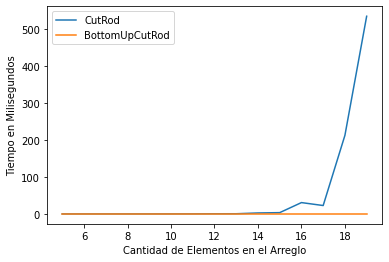

In [55]:
import matplotlib.pyplot as plt
import random
import datetime
from timeit import repeat

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,20):
  a = cutrod_instance_generator(n)
  i = random.choice(range(1, len(a)))
  #La función repeat ejecuta 20 veces los algoritmos de selección con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import cutRod", stmt=f"cutRod({a}, {n})", repeat=1, number=5)
  t2 = repeat(setup="from __main__ import BottomUpCutRod", stmt=f"BottomUpCutRod({a}, {n}, {0})", repeat=1, number=5)

  x.append(n)
  y.append(t)
  x1.append(n)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["CutRod","BottomUpCutRod"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

**Análisis**: Si bien ambas funciones parecen estar muy igualadas con arreglos de menor tamaño, en cierto punto la función **Recursiva** se dispara, mostrando un tiempo de ejecución muy alto. La función **Bottom-Up** se mantiene bastante similiar en su ejecución.

**Explicación**: Esto se puede explicar debido al tiempo de ejecución de cada algoritmo. El algoritmo **recursivo** considera todas las posibilidades existentes (aunque se repitan algunas), y calcula todos los sub-problemas posibles, dando un tiempo de ejecución de $O(2^n)$, tiempo excesivamente alto a comparación del $O(n^2)$ de la versión **Bottom-Up**. Se puede inferir que **BottomUpCutRod** siempre funciona más rápido, pero que debido a la gran diferencia que se genera en los arreglos de tamaño mayor, el gráfico no logra mostrar la diferencia de ambos algoritmos en los tamaños menores.

---
###Sub-problemas de Bottom-Up

Si bien este algoritmo probó ser mucho más eficiente que su rival en el experimento anterior. La siguiente prueba llevará a un análisis más detallado del tiempo de ejecución del algortimo.

A continuación se presenta un gráfico que modelará la cantidad de sub-problemas que debe resolver **BottomUpCutRod** a medida crece la cantidad de datos:


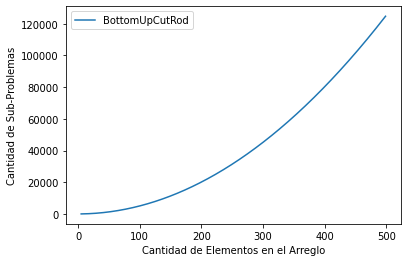

In [60]:
x=[]; y=[]

for n in range(5,500):
  a = cutrod_instance_generator(n)
  maxValue, cont = BottomUpCutRod(a, n, 0)

  x.append(n)
  y.append(cont)

plt.plot(x,y)
plt.legend(["BottomUpCutRod"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Cantidad de Sub-Problemas')
plt.show()

**Análisis**: Se puede observar un crecimiento exponencial de la línea que representa al algoritmo **BottomUpCutRod** a medida aumenta la cantidad de elementos en el arreglo.

**Explicación**: Esto se debe a que la cantidad de sub-problemas que resuelve el algoritmo es de $\frac{n^2}{2} + \frac{n}{2}$, como se vió anteriormente. Conforme va aumentando el número de elementos, el término cuadrático comienza a tomar fuerza en el cálculo, generando un aumento de forma exponencial.